# Prelucrarea imaginilor cu DFT

### Echipa: Negulescu Stefan, Marculescu Andrei

In [1]:
from scipy import misc, ndimage, signal, io
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io.wavfile

### 1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.

a) xn1,n2=sin(2πn1+3πn2)
    Array-ul `img` reprezinta imaginea rezultata prin aplicarea functiei respective, valorile fiind normalizate in intervalul [0,255]. Pentru a vizualiza spectrul imaginii, este calculat `fft` si apoi este modificat cu functia `np.fft.fftshift` astfel incat originea sa fie in centru.
    Spectrul rezultat indica faptul ca imaginea este formata in principal din linii orizontale, verticale, si oblice, liniile oblice din spectru indicand prezenta liniilor oblice simetrice fata de Ox in imagine. 

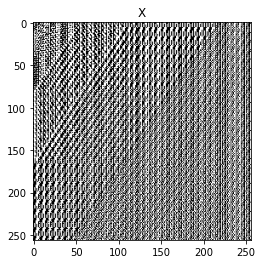

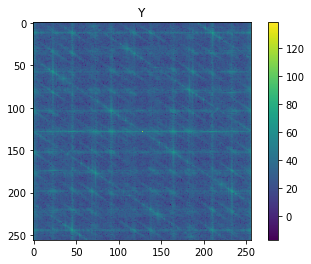

In [2]:
img = np.array([[(np.sin(2*np.pi*i+3*np.pi*j)+1)*127 for j in range(256)] for i in range(256)], dtype=np.uint8)
#print(*img)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("X")
plt.show()

Y = np.fft.fft2(img)
freq_db = 20*np.log10(abs(np.fft.fftshift(Y)))
plt.imshow(freq_db)
plt.colorbar()
plt.title("Y")
plt.show()

b) xn1,n2=sin(4πn1)+cos(6πn2)
    Procesul este asemanator cu cel de la punctul a).
    Spectrtul rezultat indica prezenta liniilor oblice, de acolo rezultand cele mai importante frecvente din imagine.

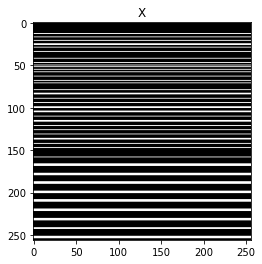

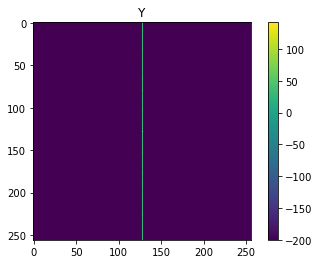

In [71]:
img = np.array([[((np.sin(4*np.pi*i) + np.cos(6*np.pi*j)) + 2)*63 for j in range(256)]
                for i in range(256)], dtype=np.uint8)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("X")
plt.show()

Y = np.fft.fft2(img)
for i in range(len(Y)):
    for j in range(len(Y[0])):
        if Y[i][j] == 0:
            Y[i][j] = -10**-10
            
freq_db = 20*np.log10(abs(np.fft.fftshift(Y)))

plt.imshow(freq_db)
plt.colorbar()
plt.title("Y")
plt.show()

c) Y0,5=Y0,N−5=1, altfel Ym1,m2=0, ∀m1,m2
    Pentru a vizualiza imaginea pornind de la spectru a fost folosita functia `np.fft.ifft2` pentru a calcula inversa fft. Spectrul indica preenta exclusiva a liniilor verticale cu o frecventa de 5.

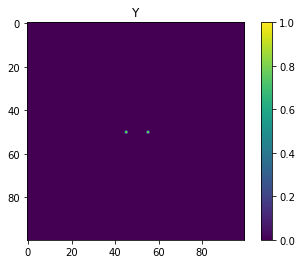

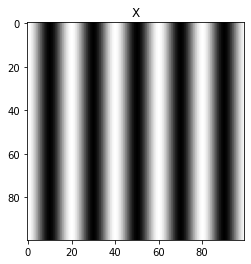

In [72]:
fr = np.zeros([100, 100])
fr[0][5] = 1
fr[0][fr.shape[1]-5] = 1

X = np.fft.ifft2(fr)
copy = X
X = np.real(X)

plt.imshow(np.fft.fftshift(fr))
plt.colorbar()
plt.title("Y")
plt.show()

plt.imshow(X, cmap=plt.cm.gray)
plt.title("X")
plt.show()

d) Y5,0=YN−5,0=1, altfel Ym1,m2=0, ∀m1,m2
    Vizualizand spectrul, putem ajunge la concluzia ca imaginea este formata numai din linii orizontale (frecventa verticala) cu frecventa 5. Practic, aceasta imagine este imaginea de la `c)` rotita la 45 grade. 

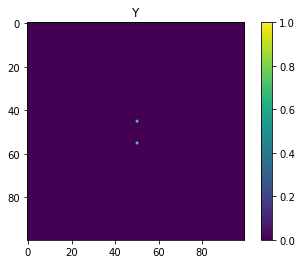

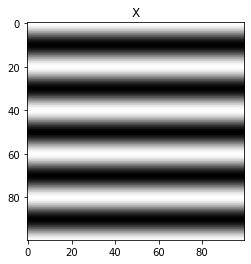

In [5]:
fr = np.zeros([100, 100])
fr[5][0] = 1
fr[fr.shape[1]-5][0] = 1

X = np.fft.ifft2(fr)
X = np.real(X)  
    
plt.imshow(np.fft.fftshift(fr))
plt.colorbar()
plt.title("Y")
plt.show()

plt.imshow(X, cmap=plt.cm.gray)
plt.title("X")
plt.show()

e) Y5,5=YN−5,N−5=1, altfel Ym1,m2=0, ∀m1,m2
    Spectrul indica faptul ca frecventa este prezenta in imagine daca aceasta este parcursa din coltul dreapta-jos catre stanga-sus.

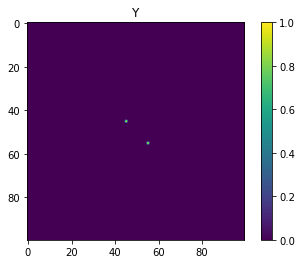

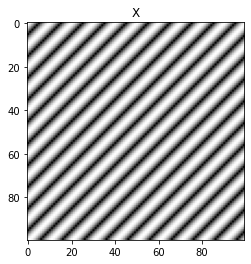

In [6]:
fr = np.zeros([100, 100])
fr[5][5] = 1
fr[fr.shape[1]-5][fr.shape[1]-5] = 1

X = abs(np.fft.ifft2(fr))
X = np.real(X)   

plt.imshow(np.fft.fftshift(fr))
plt.colorbar()
plt.title("Y")
plt.show()

plt.imshow(X, cmap=plt.cm.gray)
plt.title("X")
plt.show()


In [7]:
"""
fig = plt.figure()
t = np.arange(fr.shape[0]) - fr.shape[0] // 2
f = np.arange(fr.shape[1]) - fr.shape[0] // 2
plt.pcolormesh(t, f, abs(np.fft.fftshift(fr)), shading='gouraud')
plt.colorbar()
plt.show()
"""

"\nfig = plt.figure()\nt = np.arange(fr.shape[0]) - fr.shape[0] // 2\nf = np.arange(fr.shape[1]) - fr.shape[0] // 2\nplt.pcolormesh(t, f, abs(np.fft.fftshift(fr)), shading='gouraud')\nplt.colorbar()\nplt.show()\n"

### 2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

Raportul SNR este calculat ca raportul dintre media pixelilor si deviatia standard a acestora.

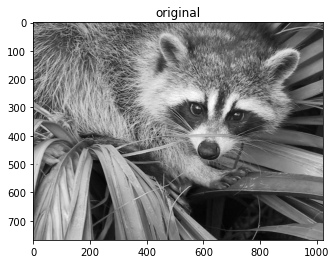

SNR:  3.1676093078565417  dB


In [73]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.title("original")
plt.show()
snr_db = 10*np.log10(np.mean(X) / np.std(X))
print("SNR: ", snr_db, " dB")

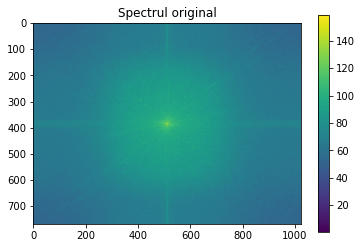

In [9]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(np.fft.fftshift(freq_db))
plt.colorbar()
plt.title("Spectrul original")
plt.show()

Au fost eliminate toate frecventele cu o magnitudine mai mica decat 90. In acest caz, frecventele inalte au o modulul transformatei mai mic decat 90. A fost ales pragul de 90 deoarece cele mai importante frecvente se afla sub acesta, astfel imaginea rezultata fiind aproape la fel de clara ca originala. 

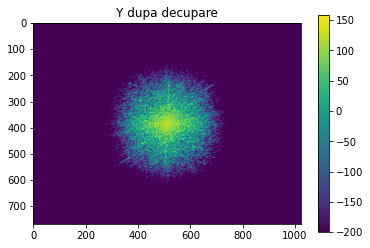

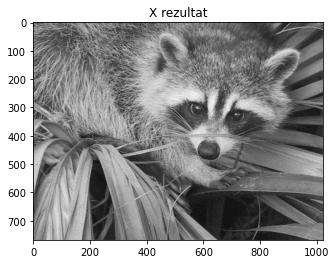

SNR:  3.224044373898786  dB


In [10]:
freq_cutoff = 90

Y_cutoff = Y.copy()
Y_cutoff[freq_db < freq_cutoff] = 10**(-10) # =0 in realitate, am folosit aceasta exprimare din cauza
                                            # functiei log10 in care pot avea loc impartiri la 0

plt.imshow(np.fft.fftshift(20*np.log10(abs(Y_cutoff))))
plt.colorbar()
plt.title("Y dupa decupare")
plt.show()

X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.title("X rezultat")
plt.show()

snr_db = 10*np.log10(np.mean(X_cutoff) / np.std(X_cutoff))
print("SNR: ", snr_db, " dB")

### 3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

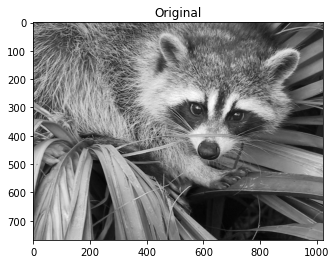

SNR X:  3.1676093078565417  dB


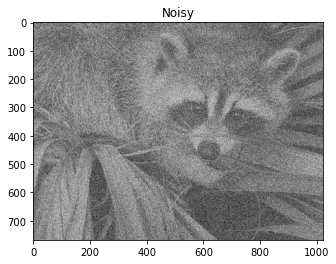

SNR X_noisy:  -0.5208214491404091  dB


In [68]:

pixel_noise = 200
noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
Y_noisy = np.fft.fft2(X_noisy)

plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()

"""
freq_db = 20*np.log10(abs(Y))
plt.imshow(np.fft.fftshift(freq_db))
plt.colorbar()
plt.title("Spectrul original")
plt.show()
"""

snr_db = 10*np.log10(np.mean(X) / np.std(X))
print("SNR X: ", snr_db, " dB")

plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

"""
freq_db = 20*np.log10(abs(Y_noisy))
plt.imshow(np.fft.fftshift(freq_db))
plt.colorbar()
plt.title("Spectrul cu zgomot")
plt.show()
"""

snr_db = 10*np.log10(np.mean(X_noisy) / np.std(X_noisy))
print("SNR X_noisy: ", snr_db, " dB")

Pentru a filtra imaginea am utilizat `cv2` din `opencv`. 
Am incercat un kernel de 6x6 cu toate elementele egale cu 1/36, si un filtru gaussian de 9x9. Rezultatele sunt asemanatoare, fiind prezentat si raportul SNR al fiecaruia.

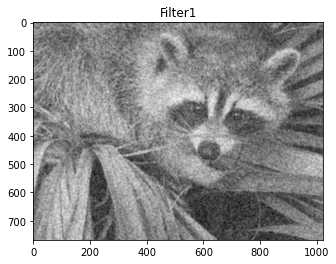

SNR filter1:  3.1721192598342896  dB


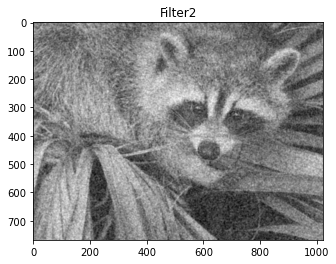

SNR filter2:  3.1553423404693604  dB


In [83]:
X_noisy = X + noise

kernel_1 = np.ones((6,6), np.float32) / (6**2)

filter_1 = cv2.filter2D(np.float32(X_noisy), -1, kernel_1)
filter_2 = cv2.GaussianBlur(np.float32(X_noisy), (9,9), 0)

plt.imshow(filter_1, cmap=plt.cm.gray)
plt.title("Filter1")
plt.show()
snr_db = 10*np.log10(np.mean(filter_1) / np.std(filter_1))
print("SNR filter1: ", snr_db, " dB")

plt.imshow(filter_2, cmap=plt.cm.gray)
plt.title("Filter2")
plt.show()
snr_db = 10*np.log10(np.mean(filter_2) / np.std(filter_2))
print("SNR filter2: ", snr_db, " dB")

### 4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la laboratorul 3.

Secventa este citita din `sample2.wav` si ii este afisat spectrul.

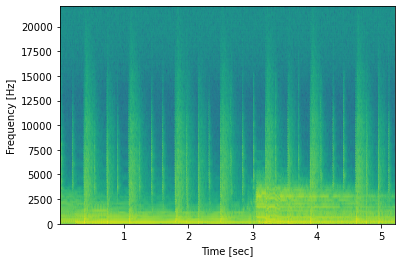

In [69]:
rate, x = scipy.io.wavfile.read('sample_2.wav')
f,t,s = signal.spectrogram(x, fs=rate)
fig = plt.figure()
plt.pcolormesh(t, f, 10*np.log10(s), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Este eliminat bass-ul care are frecventa maxima 250 Hz. Sample-ul este filtrat cu Butterworth high-pass filter, `threshold` reprezentand frecventa de 250 Hz normalizata.

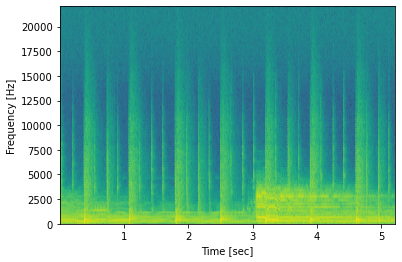

In [67]:
threshold = 250 / (rate/2)

butter_b, butter_a = scipy.signal.butter(5, threshold, btype='high')
butter_filtered = scipy.signal.filtfilt(butter_b, butter_a, x)

f,t,s = signal.spectrogram(butter_filtered, fs=rate)
fig = plt.figure()
plt.pcolormesh(t, f, 10*np.log10(s), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Ia final, fisierul `result.wav` va contine sample-ul filtrat, in care se poate observa lipsa bass-ului.

In [63]:
scipy.io.wavfile.write('result.wav', rate, np.array([int(i) for i in butter_filtered],dtype=np.int16))